**LIBRARIES AND SETTINGS**

In [385]:
# LIBRARIES
import os
import re
import time
import requests
import json
import folium
import fnmatch
import numpy as np
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# IGNORE WARNINGS
import warnings
warnings.filterwarnings("ignore")

# GET CURRENT WORKING DIRECTORY
print(os.getcwd())


/workspaces/data_analytics_project


---

**DATA IMPORT**

In [386]:
# SHOW .CSV - FILES IN THE DIRECTORY
flist = fnmatch.filter(os.listdir('.'), '*.csv')
for i in flist:
    print(i)

# READ THE DATA TO A PANDAS DATA FRAME
df = pd.read_csv('IMDB Top 250 Movies.csv', sep=';', encoding='utf-8')
df.head()

IMDB Top 250 Movies.csv
top_250_movies_prepared.csv


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count
0,The Shawshank Redemption,Drama,1994,142,12,Frank Darabont,"9,3",2969404
1,The Godfather,"Crime, Drama",1972,175,16,Francis Ford Coppola,"9,2",2070969
2,The Godfather Part II,"Crime, Drama",1974,202,16,Francis Ford Coppola,"9,0",1398083
3,The Dark Knight,"Action, Crime, Drama, Thriller",2008,152,16,Christopher Nolan,"9,0",2950798
4,12 Angry Men,"Crime, Drama",1957,96,12,Sidney Lumet,"9,0",895706


**COUNT / DATA TYPE**

In [387]:
# DIMENSION (ROWS, COLUMNS)
print('Dimension:', df.shape)
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

# GET DATA TYPES
df.dtypes

Dimension: (250, 8)
Number of rows: 250
Number of columns: 8


title             object
genres            object
release_year       int64
runtime_(mins)     int64
age_rating        object
director          object
movie_rating      object
votes_count        int64
dtype: object

**COUNT / IDENTIFY MISSING VALUES (IF ANY)**

In [388]:
# COUNT MISSING VALUES
print(pd.isna(df).sum())

# IDENTIFY ROWS WITH MISSING VALUES
df[df.isna().any(axis=1)].head()

title             0
genres            0
release_year      0
runtime_(mins)    0
age_rating        0
director          0
movie_rating      0
votes_count       0
dtype: int64


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count


**COUNT / IDENTIFY DUPLICATED VALUES (IF ANY)**

In [389]:
# COUNT DUPLICATED VALUES
print(df.duplicated().sum())

# IDENTIFY ROWS WITH DUPLICATED VALUES
df[df[['title', 'genres', 'release_year']].duplicated()]

0


,title,genres,release_year,runtime_(mins),age_rating,director,movie_rating,votes_count


**DROP ROWS WITH MISSING VALUES**

In [390]:
# DROP MISSING VALUES
print(df.shape)
df = df.dropna()

# DROP DUPLICATED VALUES
print(df.shape)

(250, 8)
(250, 8)


**CREATE NEW VARIABLE (CATEGORIAL)**

In [391]:
# DEFINE LABLES
labels = ['1900 - 1949', '1950 - 1999', '2000 - 2050']
labels_price = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

# CREATE CATEGORIES 
df["year_cat1"] = pd.cut(df['release_year'], bins=[1900, 1950, 2000, 2050], labels=labels)
df["year_cat2"] = pd.cut(df['release_year'], bins=[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],labels=labels_price)

# SHOW CATEGORIES
df[['release_year', 'year_cat1', 'year_cat2']].head(10)

,release_year,year_cat1,year_cat2
0,1994,1950 - 1999,1990s
1,1972,1950 - 1999,1970s
2,1974,1950 - 1999,1970s
3,2008,2000 - 2050,2000s
4,1957,1950 - 1999,1950s
5,1993,1950 - 1999,1990s
6,2003,2000 - 2050,2000s
7,1994,1950 - 1999,1990s
8,2001,2000 - 2050,2000s
9,1999,1950 - 1999,1990s


<U>**EXPLORATORY DATA ANALYSIS (EDA): RICH NON-GRAPHICAL**</U>

***SUMMARY STATISTICS OF NUMERIC VARIABLES***

In [392]:
df.describe().round(2)

,release_year,runtime_(mins),votes_count
count,250.00,250.00,250.00
mean,1985.01,128.87,709757.84
std,24.77,30.91,586931.42
min,1921.00,45.00,33534.00
25%,1967.25,107.00,236900.25
50%,1992.00,126.00,588805.00
75%,2004.75,143.75,1088985.25
max,2019.00,238.00,2969404.00


***QUANTILES VALUES***

In [393]:
df[['release_year', 'runtime_(mins)']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,release_year,runtime_(mins)
0.05,1940.00,88.00
0.10,1948.00,93.90
0.25,1967.25,107.00
0.50,1992.00,126.00
0.75,2004.75,143.75
0.90,2014.00,175.20
0.95,2016.55,184.10


***DIRECTORS WITH THE MOST MOVIES***

In [394]:
df['director'].value_counts().head(10) 

director
Martin Scorsese      8
Alfred Hitchcock     7
Stanley Kubrick      7
Christopher Nolan    7
Steven Spielberg     7
Billy Wilder         6
Quentin Tarantino    6
Charles Chaplin      5
Ridley Scott         4
Roman Polanski       3
Name: count, dtype: int64

<U>**EXPLORATORY DATA ANALYSIS (EDA): RICH GRAPHICAL**</U>

***HISTOGRAM (DISTRIBUTION OF MOVIE RELEASES PER DIRECTOR)***

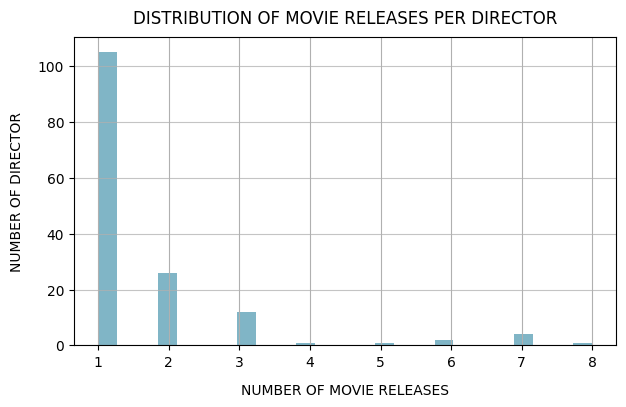

In [395]:

# PLOT HISTOGRAM
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['director'].value_counts(), 
                            bins=25, 
                            color='#026c8e',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# SET LABELS
plt.title('DISTRIBUTION OF MOVIE RELEASES PER DIRECTOR', fontsize=12, pad=10)
plt.xlabel('NUMBER OF MOVIE RELEASES', fontsize=10, labelpad=10)
plt.ylabel('NUMBER OF DIRECTOR', fontsize=10, labelpad=10)

# SET FONT SIZE OF LABELS
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

***HISTOGRAM (DISTRIBUTION OF MOVIES BY RELEASE YEAR)***

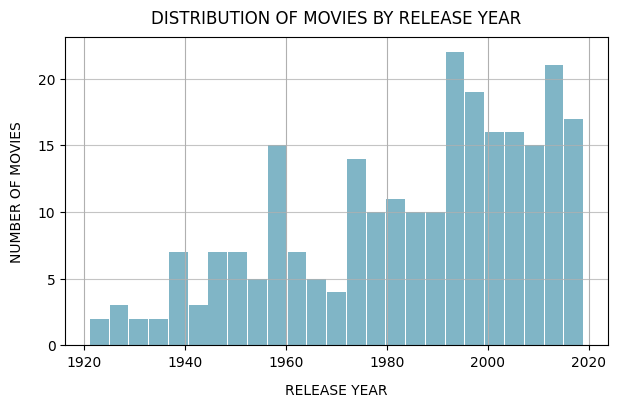

In [396]:

# PLOT HISTOGRAM
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['release_year'], 
                            bins=25, 
                            color='#026c8e',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# SET LABELS
plt.title('DISTRIBUTION OF MOVIES BY RELEASE YEAR', fontsize=12, pad=10)
plt.xlabel('RELEASE YEAR', fontsize=10, labelpad=10)
plt.ylabel('NUMBER OF MOVIES', fontsize=10, labelpad=10)

# SET FONT SIZE OF LABELS
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

## Regression Model

In [397]:
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Change datatype

In [398]:
# Change datatype of movie_rating to float
df['movie_rating'] = df['movie_rating'].str.replace(',', '.').astype(float)

print(df['movie_rating'].dtype)

float64


### Train and test samples, train 80% test 20%

In [399]:
# Create train and test samples for runtime
X_train, X_test, y_train, y_test = train_test_split(df['votes_count'], 
                                                    df['movie_rating'], 
                                                    test_size=0.20, 
                                                    random_state=42)
# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

# Modell soll versuchen vorherzusagen, wie gut ein Film bewertet wird, basierend auf der Anzahl der Bewertungen

X_train:
132    100314
225    268151
238    157842
119    841663
136    191460
Name: votes_count, dtype: int64 

y_train:
132    8.1
225    8.1
238    7.9
119    8.1
136    8.1
Name: movie_rating, dtype: float64


### Fit the simple linear regression model

In [400]:
# Fit the regression model for release year
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}')
print(f'Slope of regression line (beta):          {slope:.3f}')
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            8.01
Slope of regression line (beta):          0.000
p-value:                                  0.0000
R-squared (coefficient of determination): 0.4633


### Plot regression line

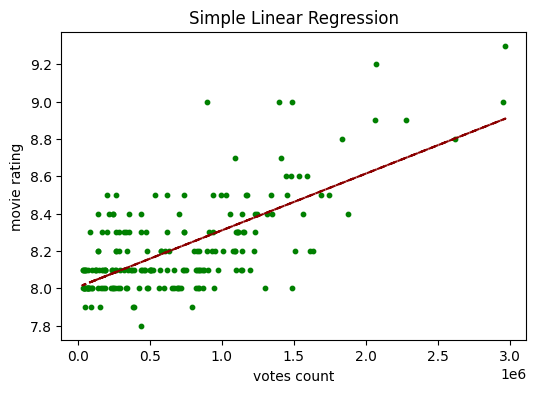

In [401]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('votes count')
plt.ylabel('movie rating')

plt.show()

### Check model residuals

In [402]:
# Calculate model residuals for train data
residuals = y_train - mymodel

# Check the first residual value in our data set
print(f'1st Predicted rating in dataset: {mymodel[0]:.2f}')
print(f'1st Observed rating in dataset: {y_train[0]:.2f}')
print(f'1st Residual rating in dataset: {residuals[0]:.2f}')

1st Predicted rating in dataset: 8.04
1st Observed rating in dataset: 9.30
1st Residual rating in dataset: 1.26


### Plot histogram of residuals

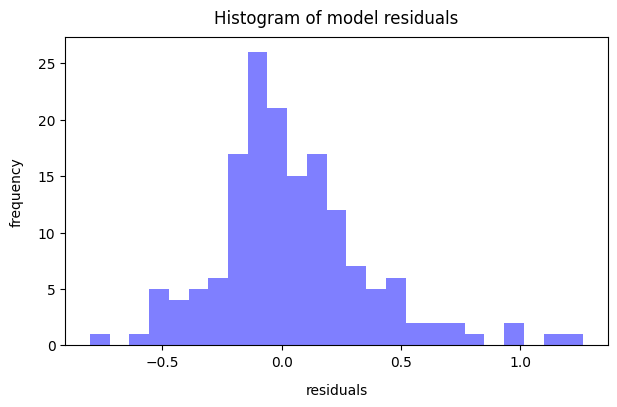

In [403]:
# Plot histogram of residuals
fig = plt.figure( figsize=(7,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Show plot
plt.show()

### Compare the observed votes with the predicted votes

In [404]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed rating: {y_test.iloc[i]:.1f}, Predicted rating: {predicted.iloc[i]:.1f}')

Observed rating: 8.1, Predicted rating: 8.2
Observed rating: 9.0, Predicted rating: 8.6
Observed rating: 8.2, Predicted rating: 8.1
Observed rating: 8.4, Predicted rating: 8.2
Observed rating: 8.2, Predicted rating: 8.1
Observed rating: 8.1, Predicted rating: 8.2
Observed rating: 8.1, Predicted rating: 8.0
Observed rating: 8.1, Predicted rating: 8.3
Observed rating: 8.8, Predicted rating: 8.7
Observed rating: 8.2, Predicted rating: 8.0


## Multiple linear regression

### Create train and test samples (train = 80%, test = 20% of the data)

In [405]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['release_year',
                                                            'votes_count',
                                                            'runtime_(mins)']], 
                                                        df['movie_rating'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     release_year  votes_count  runtime_(mins)
132          1926       100314              78
225          1965       268151             172
238          1948       157842              80
119          2015       841663              95
136          2009       191460              92 

y2_train:
132    8.1
225    8.1
238    7.9
119    8.1
136    8.1
Name: movie_rating, dtype: float64


### fit the regression model

In [406]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y2_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:           movie_rating   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     121.8
Date:                Thu, 26 Dec 2024   Prob (F-statistic):           1.49e-44
Time:                        09:32:10   Log-Likelihood:                 97.199
No. Observations:                 200   AIC:                            -186.4
Df Residuals:                     196   BIC:                            -173.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             17.7956      0.962     18.

### Plot histogram of residuals

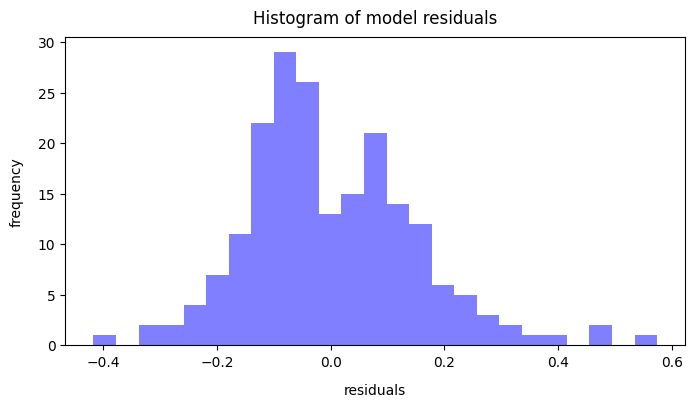

In [407]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=25, 
                            color='blue',
                            alpha=0.5
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.show()

### Compare the observed ratings with the predicted ratings

In [408]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare the observed prices with the predicted prices
for i in range(0,10):
    print(f'Observed rating: {y_test.iloc[i]:.1f}, Predicted rating: {predicted_new.iloc[i]:.1f}')

Observed rating: 8.1, Predicted rating: 8.2
Observed rating: 9.0, Predicted rating: 8.7
Observed rating: 8.2, Predicted rating: 8.1
Observed rating: 8.4, Predicted rating: 8.3
Observed rating: 8.2, Predicted rating: 8.2
Observed rating: 8.1, Predicted rating: 8.2
Observed rating: 8.1, Predicted rating: 8.3
Observed rating: 8.1, Predicted rating: 8.2
Observed rating: 8.8, Predicted rating: 8.9
Observed rating: 8.2, Predicted rating: 8.2


### Jupyter notebook --footer info--

In [409]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-12-26 09:32:10
Python Version: 3.11.10
-----------------------------------


###